#**Kitasabi.com (Kelompok 5)**


*   M Choiril Iman
*   Yehezkiel Novianto

*   Ahmad Reza
*   Celestial Randy


*   Risca Naquitasia
*   Sonia Epifany Sandah

*   Oky Hariawan






In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [124]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix, recall_score, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [125]:
df = pd.read_csv('hotel_booking.csv')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [127]:
# initialize df_clean
df_clean = df.copy()

In [128]:
#Numeric
numerical = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()

#Categorical
categorical = df_clean.loc[:, (df_clean.dtypes != int) & (df_clean.dtypes != float)].columns.tolist()

In [129]:
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [130]:
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

# **Handle missing values**

In [131]:
#Checking Missing Values
df_clean.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

In [132]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.307
1,agent,16340,13.686
2,country,488,0.409
3,children,4,0.003


Ditemukan 4 kolom yang memiliki missing values:

*   company
*   agent
*   country
*   children

Treatment:

*   Kolom `children` karena hanya memiliki 4 baris data yang kosong maka missing value tersebut akan di hapus
*   Kolom `agent` karena merupakan ID maka nilai akan di set 0 untuk data yang tidak memiliki ID dan 1 untuk data yang memiliki ID.
*   Kolom `company` karena banyak missing value (94%) maka feature `company` dapat di drop
*   Kolom `country` karena sebagian besar nilainya adalah PRT dan missing value rationya kecil, maka missing value tersebut akan diisi dengan nilai PRT


In [133]:
#Remove rows that have no children data
df_clean.dropna(subset=['children'], inplace=True)

In [134]:
#Change value agent to 0 and 1
df_clean['agent'] = df_clean['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['agent'].value_counts()

1    103048
0     16338
Name: agent, dtype: int64

In [135]:
df_clean.shape

(119386, 36)

In [136]:
#Drop feature company
df_clean.drop(columns=['company'], inplace = True)
df_clean.shape

(119386, 35)

In [137]:
#Fill NaN value in country with the value of mode
df_clean['country'].fillna(df_clean['country'].mode()[0], inplace = True)
df_clean['country'].value_counts()

PRT    49074
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [138]:
df_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# **Handle duplicated data**

In [139]:
df_clean.duplicated().sum()

0

In [140]:
df_clean.duplicated(subset=['name', 'email', 'phone-number', 'credit_card']).sum()

0

Tidak ditemukan adanya duplicated values

# **Handle outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

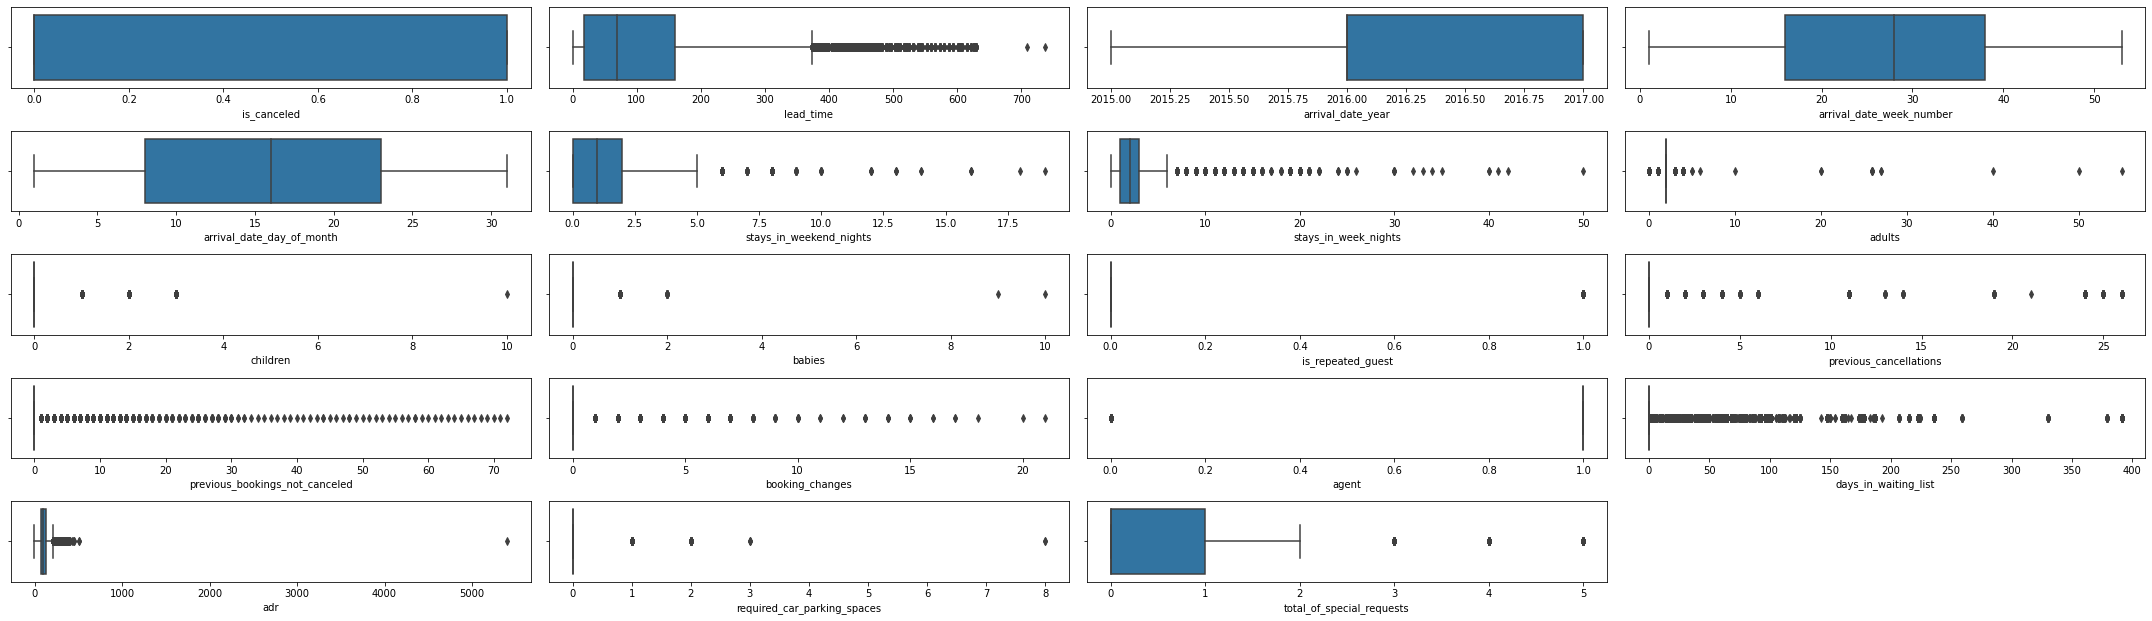

In [141]:
plt.figure(figsize = (30, 10))
x = 1 

for column in df_clean.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df_clean[column])
    x+=1
    
plt.tight_layout()


*   Dapat terlihat jika dalam data ini memiliki banyak outliers
*   Dalam hal ini kami akan menangani outlier seperti keterangan di bawah


## Lead Time Feature

In [142]:
#Cek nilai outlier
Q1 = df_clean['lead_time'].quantile(0.25)
Q3 = df_clean['lead_time'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [143]:
low_limit,high_limit,Q1,Q3

(-195.0, 373.0, 18.0, 160.0)

In [144]:
df_clean.loc[(df_clean.lead_time > high_limit,'lead_time')] = high_limit
#Karena lead time dibatasi hanya 1 tahun

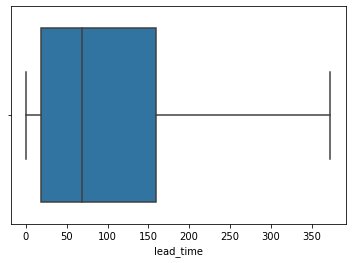

In [145]:
sns.boxplot(x = df_clean.lead_time)

## Stays in Weekend Nights

In [146]:
#Cek nilai Oulier
Q1 = df_clean['stays_in_weekend_nights'].quantile(0.25)
Q3 = df_clean['stays_in_weekend_nights'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [147]:
low_limit,high_limit,Q1,Q3

(-3.0, 5.0, 0.0, 2.0)

In [148]:
df_clean.stays_in_weekend_nights.value_counts()

0     51996
2     33307
1     30625
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [149]:
df_clean.loc[(df_clean.stays_in_weekend_nights > high_limit,'stays_in_weekend_nights')] = 2.0
#Karena kita anggap customer paling banyak stay 2 hari (modus = 0 diabaikan)

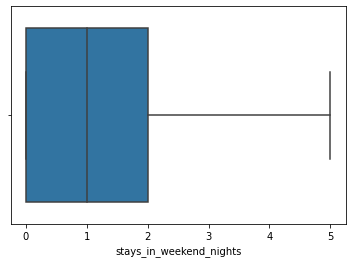

In [150]:
sns.boxplot(x = df_clean.stays_in_weekend_nights)

## **Stays in Week Nights**

In [151]:
Q1 = df_clean['stays_in_week_nights'].quantile(0.25)
Q3 = df_clean['stays_in_week_nights'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [152]:
low_limit,high_limit,Q1,Q3

(-2.0, 6.0, 1.0, 3.0)

In [153]:
df_clean.stays_in_week_nights.value_counts()

2     33682
1     30310
3     22258
5     11076
4      9563
0      7644
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

In [154]:
df_clean.loc[(df_clean.stays_in_week_nights > high_limit,'stays_in_week_nights')] = 2.0
#Karena kita anggap customer paling banyak stay 2 hari 

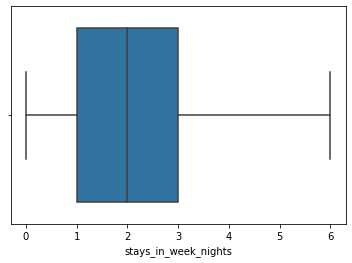

In [155]:
sns.boxplot(x = df_clean.stays_in_week_nights)

## **Adults**

In [156]:
Q1 = df_clean['adults'].quantile(0.25)
Q3 = df_clean['adults'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [157]:
df_clean.adults.value_counts()

2     89677
1     23027
3      6201
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [158]:
#Karena ada nilai 0 (Customer tidak boleh anak kecil atau babies maka nilai 0 diganti 1
df_clean.loc[(df_clean.adults == 0,'adults')] = 1

In [159]:
df_clean.adults.value_counts()

2     89677
1     23430
3      6201
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

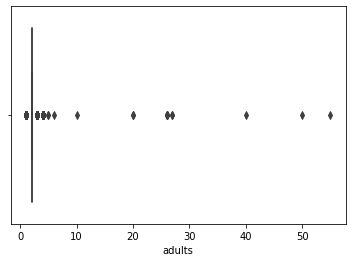

In [160]:
sns.boxplot(x = df_clean.adults)

## **Children**

In [161]:
Q1 = df_clean['children'].quantile(0.25)
Q3 = df_clean['children'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [162]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [163]:
df_clean.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [164]:
df_clean.loc[(df_clean.children ==10,'children')] = 3
#Karena kita anggap 10 anak case yg sangat spesial

In [165]:
df_clean.children.value_counts()

0.0    110796
1.0      4861
2.0      3652
3.0        77
Name: children, dtype: int64

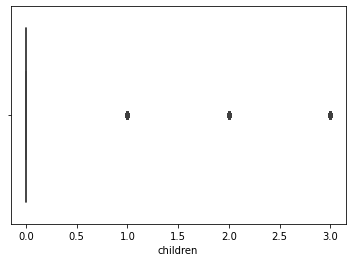

In [166]:
sns.boxplot(x = df_clean.children)

## **Babies**

In [167]:
Q1 = df_clean['babies'].quantile(0.25)
Q3 = df_clean['babies'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [168]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [169]:
df_clean.babies.value_counts()

0     118469
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [170]:
df_clean.loc[(df_clean.babies > 5,'babies')] = 2
#Karena kita anggap babies > 5 case spesial

In [171]:
df_clean.babies.value_counts()

0    118469
1       900
2        17
Name: babies, dtype: int64

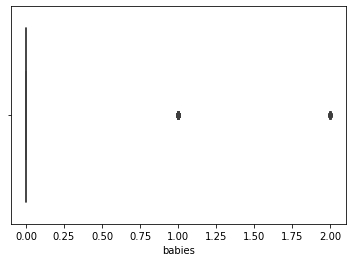

In [172]:
sns.boxplot(x = df_clean.babies)

## **Previous Cancellations**

In [173]:
Q1 = df_clean['previous_cancellations'].quantile(0.25)
Q3 = df_clean['previous_cancellations'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [174]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [175]:
df_clean.previous_cancellations.value_counts()

0     112902
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [176]:
df_clean.loc[(df_clean.previous_cancellations > 0,'previous_cancellations')] = 1
#Karena kita bagi hanya 2 keadaan pernah cancel atau tidak

In [177]:
df_clean.previous_cancellations.value_counts()

0    112902
1      6484
Name: previous_cancellations, dtype: int64

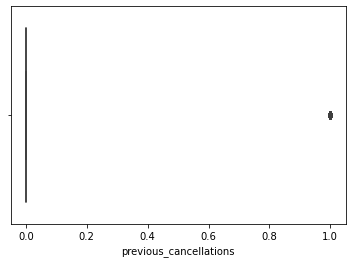

In [178]:
sns.boxplot(x = df_clean.previous_cancellations)

## **Previous Bookings Not Cancelled**

In [179]:
Q1 = df_clean['previous_bookings_not_canceled'].quantile(0.25)
Q3 = df_clean['previous_bookings_not_canceled'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [180]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [181]:
df_clean.previous_bookings_not_canceled.value_counts()

0     115766
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [182]:
df_clean.loc[(df_clean.previous_bookings_not_canceled > 0,'previous_bookings_not_canceled')] = 1
#Karena kita bagi hanya 2 keadaan pernah cancel atau tidak

In [183]:
df_clean.previous_bookings_not_canceled.value_counts()

0    115766
1      3620
Name: previous_bookings_not_canceled, dtype: int64

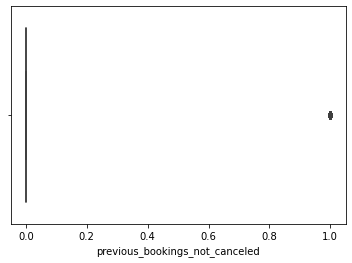

In [184]:
sns.boxplot(x = df_clean.previous_bookings_not_canceled)

## **Booking Changes**

In [185]:
Q1 = df_clean['booking_changes'].quantile(0.25)
Q3 = df_clean['booking_changes'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [186]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [187]:
df_clean.booking_changes.value_counts()

0     101310
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [188]:
df_clean.loc[(df_clean.booking_changes > 0,'booking_changes')] = 1
#Karena kita bagi hanya 2 keadaan pernah booking change atau tidak

In [189]:
df_clean.booking_changes.value_counts()

0    101310
1     18076
Name: booking_changes, dtype: int64

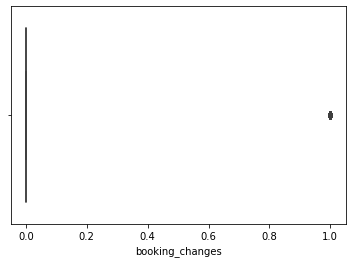

In [190]:
sns.boxplot(x = df_clean.booking_changes)

## **Days in Waiting List**

In [191]:
Q1 = df_clean['days_in_waiting_list'].quantile(0.25)
Q3 = df_clean['days_in_waiting_list'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [192]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [193]:
df_clean.days_in_waiting_list.value_counts()

0      115688
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [194]:
df_clean.loc[(df_clean.days_in_waiting_list > 1,'days_in_waiting_list')] = 1
#Karena kita bagi hanya 2 keadaan waiting list atau tidak

In [195]:
df_clean.days_in_waiting_list.value_counts()

0    115688
1      3698
Name: days_in_waiting_list, dtype: int64

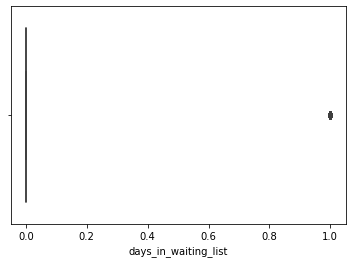

In [196]:
sns.boxplot(x = df_clean.days_in_waiting_list)

## **ADR**

In [197]:
Q1 = df_clean['adr'].quantile(0.25)
Q3 = df_clean['adr'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [198]:
low_limit,high_limit,Q1,Q3

(-15.774999999999991, 211.065, 69.29, 126.0)

In [199]:
df_clean.loc[(df_clean.adr > high_limit,'adr')] = high_limit

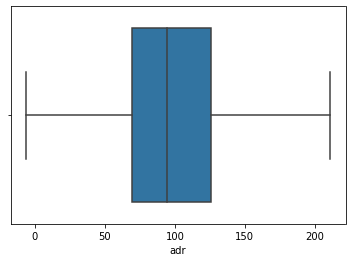

In [200]:
sns.boxplot(x = df_clean.adr)

## **Required Car Parking Spaces**

In [201]:
Q1 = df_clean['required_car_parking_spaces'].quantile(0.25)
Q3 = df_clean['required_car_parking_spaces'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [202]:
low_limit,high_limit,Q1,Q3

(0.0, 0.0, 0.0, 0.0)

In [203]:
df_clean.required_car_parking_spaces.value_counts()

0    111970
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [204]:
df_clean.loc[(df_clean.required_car_parking_spaces > 1,'required_car_parking_spaces')] = 1
#Karena kita bagi hanya 2 keadaan butuh parkir atau tidak

In [205]:
df_clean.required_car_parking_spaces.value_counts()

0    111970
1      7416
Name: required_car_parking_spaces, dtype: int64

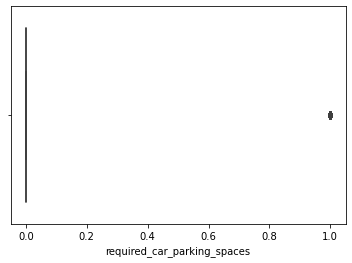

In [206]:
sns.boxplot(x = df_clean.required_car_parking_spaces)

## **Total of Special Requests**

In [207]:
Q1 = df_clean['total_of_special_requests'].quantile(0.25)
Q3 = df_clean['total_of_special_requests'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [208]:
low_limit,high_limit,Q1,Q3

(-1.5, 2.5, 0.0, 1.0)

In [209]:
df_clean.total_of_special_requests.value_counts()

0    70318
1    33223
2    12968
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [210]:
df_clean.loc[(df_clean.total_of_special_requests > high_limit,'total_of_special_requests')] = 2
#Karena nilai high limit adalah pecahan maka outlier kita jadikan angka terdekat

In [211]:
df_clean.total_of_special_requests.value_counts()

0    70318
1    33223
2    15845
Name: total_of_special_requests, dtype: int64

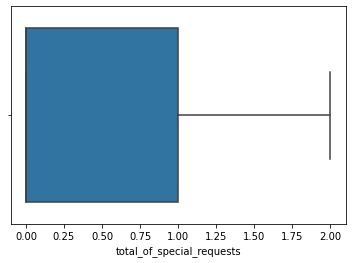

In [212]:
sns.boxplot(x = df_clean.total_of_special_requests)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

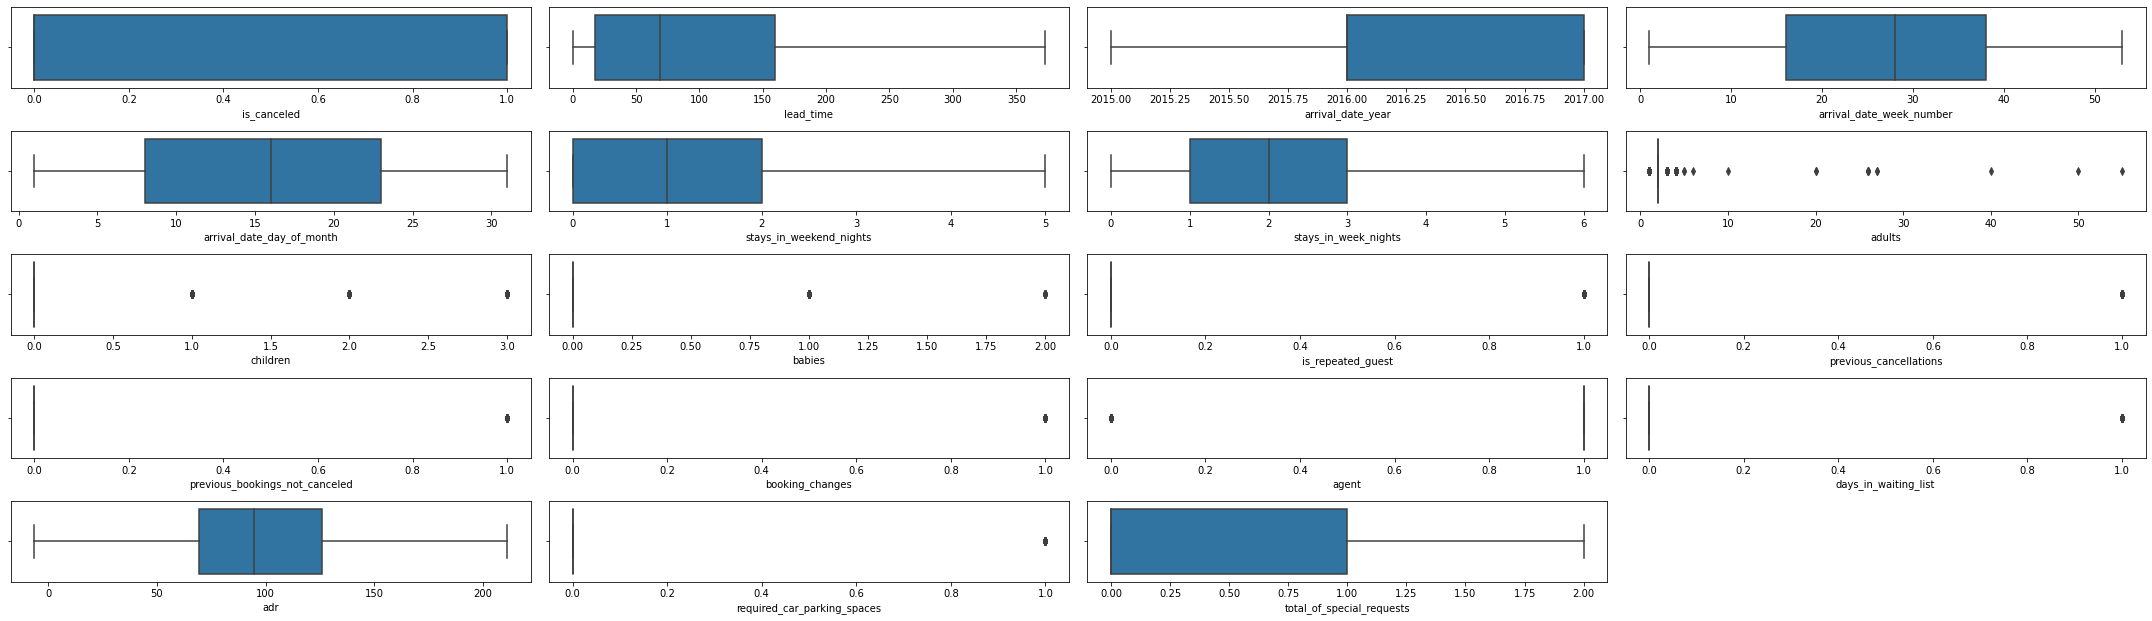

In [213]:
plt.figure(figsize = (30, 10))
x = 1 

for column in df_clean.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df_clean[column])
    x+=1
    
plt.tight_layout()

# **Feature transformation**

**Normalization**

> Normalized/re-scale kolom numerical yang memiliki angka variance tinggi guna mempermudah interpretasi beberapa model ML



In [214]:
df_clean.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


is_canceled                           0.233205
lead_time                         10233.142643
arrival_date_year                     0.500494
arrival_date_week_number            185.105119
arrival_date_day_of_month            77.102158
stays_in_weekend_nights               0.902301
stays_in_week_nights                  1.966724
adults                                0.326374
children                              0.158101
babies                                0.008047
is_repeated_guest                     0.030895
previous_cancellations                0.051362
previous_bookings_not_canceled        0.029403
booking_changes                       0.128485
agent                                 0.118123
days_in_waiting_list                  0.030016
adr                                1996.974979
required_car_parking_spaces           0.058260
total_of_special_requests             0.513534
dtype: float64

In [215]:
from sklearn.preprocessing import MinMaxScaler

df_clean['lead_time_norm'] = MinMaxScaler().fit_transform(df_clean['lead_time'].values.reshape(len(df_clean), 1))
df_clean['arrival_date_week_number_norm'] = MinMaxScaler().fit_transform(df_clean['arrival_date_week_number'].values.reshape(len(df_clean), 1))
df_clean['arrival_date_day_of_month_norm'] = MinMaxScaler().fit_transform(df_clean['arrival_date_day_of_month'].values.reshape(len(df_clean), 1))
df_clean['adr_norm'] = MinMaxScaler().fit_transform(df_clean['adr'].values.reshape(len(df_clean), 1))

In [216]:
df_clean[['lead_time_norm','arrival_date_week_number_norm','arrival_date_day_of_month_norm','adr_norm']].describe()

,lead_time_norm,arrival_date_week_number_norm,arrival_date_day_of_month_norm,adr_norm
count,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.274082,0.503173,0.493285,0.492270
std,0.271204,0.261641,0.292693,0.205512
min,0.000000,0.000000,0.000000,0.000000
25%,0.048257,0.288462,0.233333,0.347996
50%,0.184987,0.519231,0.500000,0.464347
75%,0.428954,0.711538,0.733333,0.608798
max,1.000000,1.000000,1.000000,1.000000


# **Feature encoding**

In [217]:
#Label encoding

le = LabelEncoder()

columns = [
    'hotel',
    'reserved_room_type',
    'assigned_room_type'
]

for col in columns:
    df_clean[col] = le.fit_transform(df_clean[col])


In [218]:
df_clean[['hotel', 'reserved_room_type','assigned_room_type']].head()

,hotel,reserved_room_type,assigned_room_type
0,1,2,2
1,1,2,2
2,1,0,2
3,1,0,0
4,1,0,0


In [219]:
#One Hot Encoding

for i in ['distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']:
    onehots = pd.get_dummies(df_clean[i], prefix=i)
    df_clean = df_clean.join(onehots)


In [220]:
df_clean = df_clean.drop(columns=['distribution_channel', 'deposit_type', 'customer_type', 'reservation_status'], axis =1)
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,342,2015,July,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
1,1,0,373,2015,July,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
2,1,0,7,2015,July,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,13,2015,July,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
4,1,0,14,2015,July,27,1,0,2,2,...,1,0,0,0,0,1,0,0,1,0


In [221]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  int64  
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

# **Handle class imbalance**

In [222]:
df_clean['is_canceled'].value_counts()

0    75166
1    44220
Name: is_canceled, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


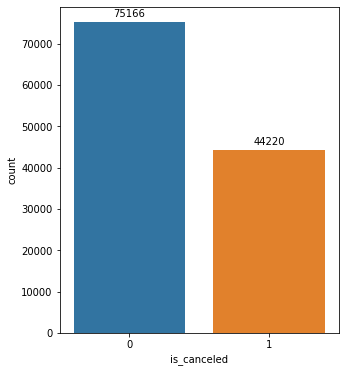

In [223]:
plt.figure(figsize=(5, 6))
cancel_ax = sns.countplot(df_clean['is_canceled'])

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

# **2. Feature Engineering**

# **Feature extraction (Add New Features)**


> **Total Stays**
</br>Dari kolom stays_in_weekend_nights dan stays_in_week_nights, kita bisa mendapatkan total jumlah hari menginap. Terlihat data `total stays` bernilai 0, hal ini memungkinkan sebab konsumen dapat check in dan checkout dihari yang sama



In [224]:
df_clean['total_stays'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,total_stays
0,1,0,342,2015,July,27,1,0,0,2,...,0,0,0,0,1,0,0,1,0,0
1,1,0,373,2015,July,27,1,0,0,2,...,0,0,0,0,1,0,0,1,0,0
2,1,0,7,2015,July,27,1,0,1,1,...,0,0,0,0,1,0,0,1,0,1
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,0,0,1,0,0,1,0,1
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,0,0,1,0,0,1,0,2



> **Total Guest**
</br>Dari kolom `adults, children and babies` kita bisa mendapatkan total jumlah orang yang menginap



In [225]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,total_stays,total_guests
0,1,0,342,2015,July,27,1,0,0,2,...,0,0,0,1,0,0,1,0,0,2.0
1,1,0,373,2015,July,27,1,0,0,2,...,0,0,0,1,0,0,1,0,0,2.0
2,1,0,7,2015,July,27,1,0,1,1,...,0,0,0,1,0,0,1,0,1,1.0
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,0,1,0,0,1,0,1,1.0
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,0,1,0,0,1,0,2,2.0



> **Kids**
</br>Dari kolom `children and babies` kita bisa mendapatkan total jumlah anak yang menginap. Karena biasanya hanya ada kategori tamu dewasa dan anak (dibawah 17 tahun) dalam pemesanan kamar hotel



In [226]:
df_clean['kids'] = df_clean['children'] + df_clean['babies']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,total_stays,total_guests,kids
0,1,0,342,2015,July,27,1,0,0,2,...,0,0,1,0,0,1,0,0,2.0,0.0
1,1,0,373,2015,July,27,1,0,0,2,...,0,0,1,0,0,1,0,0,2.0,0.0
2,1,0,7,2015,July,27,1,0,1,1,...,0,0,1,0,0,1,0,1,1.0,0.0
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,1,0,0,1,0,1,1.0,0.0
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,1,0,0,1,0,2,2.0,0.0


> **Guest Location**
</br>Karena kolom `country` memiliki data yang sangat besar, maka akan dikategorikan menjadi local & international. Pengkategorian mengacu pada lokasi hotel pada dataset yang berada di negara Portugal untuk penduduk local dan selain itu akan di kategorikan sebagai international

In [227]:
df_clean['guest_location'] = df_clean['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_clean['guest_location'].value_counts()

International    70312
Local            49074
Name: guest_location, dtype: int64

> **Arrival Columns**
</br>Dari kolom ini akan digenerate kolom baru berdasrkan bulan dan hari 

> **Meal Columns**
</br>Dari kolom ini didapat data bernilai 'undentified'. Dari source dataset ini menyebutkan bahwa undentified sama dengan SC (no meal package), untuk itu kami akan mengganti nilai undentified menjadi SC

In [228]:
df_clean['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [229]:
df_clean['meal'].value_counts()

BB           92306
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [230]:
df_clean['meal'] = df_clean['meal'].str.replace('Undefined', 'SC')
df_clean['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

> **Distribution Channel**
</br>Dari kolom ini didapat data bernilai Undefined dan akan di ganti menjadi TA/TO yang merupakan nilai modus

> **Market Segment**
</br>Dari kolom ini didapat data bernilai Undefined dan akan di ganti menjadi online TA yang merupakan modus

In [231]:
df_clean['market_segment'].value_counts()

Online TA        56476
Offline TA/TO    24219
Groups           19811
Direct           12605
Corporate         5295
Complementary      743
Aviation           237
Name: market_segment, dtype: int64

In [232]:
df_clean['market_segment'] = df_clean['market_segment'].replace('Undefined', 'Online TA')
df_clean['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

# **Feature selection (Remove Irrelevant Features)**

In [233]:
df_clean[['name', 'email', 'phone-number', 'credit_card']].head()

,name,email,phone-number,credit_card
0,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [234]:
#Delete 'name', 'email', 'phone-number', 'credit_card' attributes
df_clean.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace=True)


Kolom `name, email, phone-number, credit_card` adalah kolom yang tidak memiliki pola, jadi kita dapat menghapus kolom tersebut

# **Feature selection (Remove Redundant Column)**

In [235]:
#Delete 'stays_in_weekend_nights', 'stays_in_week_nights', 'children', & 'babies'
df_clean.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies','adr','lead_time'], axis = 1, inplace=True)


*   Kolom `stays_in_weekend_nights` dan `stays_in_week_nights` dihapus karena sudah ada kolom `total_stays`
*   Kolom `children` dan `babies` dihapus karena sudah ada kolom `kids`

Apakah kolom yang sudah di transformasi bisa ikut dihapus?

In [236]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  int64  
 1   is_canceled                     119386 non-null  int64  
 2   arrival_date_year               119386 non-null  int64  
 3   arrival_date_month              119386 non-null  object 
 4   arrival_date_week_number        119386 non-null  int64  
 5   arrival_date_day_of_month       119386 non-null  int64  
 6   adults                          119386 non-null  int64  
 7   meal                            119386 non-null  object 
 8   country                         119386 non-null  object 
 9   market_segment                  119386 non-null  object 
 10  is_repeated_guest               119386 non-null  int64  
 11  previous_cancellations          119386 non-null  int64  
 12  previous_booking

# **Feature Tambahan**

*   Creating two dataframes, Split data Resort Hotel & City Hotel
*   Creating new feature: `Weekday vs Weekend` 
*   Creating new feature: `Summer vs Winter` 




*  **Customer Satisfaction Rate (Rating)**: 
Fitur ini perlu ditambahkan karena dapat digunakan untuk menilai kinerja pelayanan hotel dan mungkin saja berpengaruh terhadap cancellation rate. Hipotesis dari kami adalah semakin tinggi rating yang diberikan kepada hotel, maka akan semakin rendah cancellation rate.
*  **Total Revenue:** Pada Dataset hanya disajikan data mengenai Average Daily Rate (ADR), yang didapatkan dari pendapatan kamar/kamar terisi. Fitur ini belum belum menggambarkan pengeluaran tiap customer per order. Total Revenue dapat digunakan untuk menganalisis efektifivitas pricing yang telah ditetapkan dan mungkin mungkin saja berpengaruh terhadap cancellation rate. 

*  **Reason For Staying:** Alasan seseorang melakukan pemesanan hotel diantaranya adalah Business Trip atau Holiday. Dengan mengetahui alasan tersebut, kedepannya dapat dibuat Marketing Campaign dengan bekerja sama dengan sebuah perusahaan atau tempat wisata di daerah setempat. Selain itu, kita juga akan mengetahui hubungan antara Reason For Staying dan Cancellation rate di hotel tersebut. 
*  **Reason For Cancelled:** Alasan seseorang melakukan pembatalan reservation hotel diantaranya adalah Change Mind, Find Better Hotel, Weather Issue, dan lain sebagainya. Faktor alasan pembatalan yang dikarenakan alasan pribadi customer dapat dimaklumi, namun jika alasan pembatalan karena find better hotel, diperlukan evaluasi kinerja ataupun fasilitas dari hotel tersebut dibandingkan dengan hotel competitor sekitar.

*  **Promotion Apply:** Dengan adanya fitur ini, dapat diketahui efektifitas promosi yang sedang dijalankan, sekaligus mengetahui apakah customer yang order dengan menggunakan promo, kemungkinan cancel nya akan lebih tinggi atau rendah. 







# **Modelling**

## modelling

In [237]:
le = LabelEncoder()

columns = [
    'guest_location','meal','market_segment'
]

for col in columns:
    df_clean[col] = le.fit_transform(df_clean[col])

In [238]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  int64  
 1   is_canceled                     119386 non-null  int64  
 2   arrival_date_year               119386 non-null  int64  
 3   arrival_date_month              119386 non-null  object 
 4   arrival_date_week_number        119386 non-null  int64  
 5   arrival_date_day_of_month       119386 non-null  int64  
 6   adults                          119386 non-null  int64  
 7   meal                            119386 non-null  int64  
 8   country                         119386 non-null  object 
 9   market_segment                  119386 non-null  int64  
 10  is_repeated_guest               119386 non-null  int64  
 11  previous_cancellations          119386 non-null  int64  
 12  previous_booking

In [239]:
df_clean.columns.tolist()

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'adults',
 'meal',
 'country',
 'market_segment',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'lead_time_norm',
 'arrival_date_week_number_norm',
 'arrival_date_day_of_month_norm',
 'adr_norm',
 'distribution_channel_Corporate',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'deposit_type_No Deposit',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Contract',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'reservation_status_Canceled',
 'reservation_status_Check-Out',
 'reservation_statu

In [240]:
cancel_corr = df_clean.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

reservation_status_Check-Out      1.000000
reservation_status_Canceled       0.978433
deposit_type_Non Refund           0.481488
deposit_type_No Deposit           0.477942
guest_location                    0.331560
lead_time_norm                    0.295229
previous_cancellations            0.270962
total_of_special_requests         0.242783
required_car_parking_spaces       0.197393
booking_changes                   0.186895
distribution_channel_TA/TO        0.176056
assigned_room_type                0.176025
distribution_channel_Direct       0.151609
hotel                             0.136505
customer_type_Transient           0.133170
reservation_status_No-Show        0.131760
customer_type_Transient-Party     0.124231
previous_bookings_not_canceled    0.115401
agent                             0.102122
days_in_waiting_list              0.099043
is_repeated_guest                 0.084788
distribution_channel_Corporate    0.075420
reserved_room_type                0.061284
adults     

In [241]:
numerical = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()
numerical

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'adults',
 'meal',
 'market_segment',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'lead_time_norm',
 'arrival_date_week_number_norm',
 'arrival_date_day_of_month_norm',
 'adr_norm',
 'total_stays',
 'total_guests',
 'kids',
 'guest_location']

In [242]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    pred = model.predict(xtest)
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.4f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Actually Not Canceled', 'Actually Canceled'],
                 columns=['Predicted Not Canceled', 'Predicted Canceled'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class');

## **Split Data**

In [243]:
# Split Feature and Label
X = df_clean[['hotel','adults','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','days_in_waiting_list',
 'required_car_parking_spaces','total_of_special_requests','lead_time_norm','adr_norm',
 'distribution_channel_Corporate',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'deposit_type_No Deposit',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Contract',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party','total_stays',
 'total_guests','kids','arrival_date_year',
 'arrival_date_week_number_norm',
 'arrival_date_day_of_month_norm','guest_location','meal','market_segment',
]]

y = df_clean['is_canceled'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## **LightGBM**

membuat model dengan parameter default

In [244]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
# predict the results
y_pred=clf.predict(X_test)
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
eval_classification(clf, X_train, y_train, X_test, y_test)

LightGBM Model accuracy score: 0.8641
Accuracy (Test Set): 0.8641
Precision (Test Set): 0.8494
Recall (Test Set): 0.7716
F1-Score (Test Set): 0.8086
AUC: 0.9417


hasil akurasi model jika menggunakan data train

In [245]:
# compare train and test set accuracy
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8709


membandingkan hasil akurasi model jika menggunakan data train dan data tes

In [246]:
# check for overfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8709
Test set score: 0.8641


### Hyperparameter tuning with optuna (framework untuk hyperparameter)

In [247]:
train_data = lgb.Dataset(X_train, label=y_train)
num_boost_rounds = 150

install packagenya terlebih dahulu

In [248]:
# hyperparameter tuning framework
%pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 14.0 MB/s 
     |████████████████████████████████| 209 kB 55.0 MB/s 
     |████████████████████████████████| 81 kB 10.2 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 112 kB 58.2 MB/s 
     |████████████████████████████████| 147 kB 57.8 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=4d64dfefd832645a4efc44e9846a98774311b2484630bce2d8a8b94ca3effec6
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


mencoba hyperparameter tuning dengan parameter objective, metric, num_boost_round, dan learning rate. nanti optuna akan mencoba coba kombinasi parameter yang tepat dan melakukan trial sejumlah yang kita masukkan (disini n_trial yang digunakan 100).

In [249]:
import optuna

def objective_lgbm(trial):
    
    param = {
        'objective': 'binary',
        'metric': 'accuracy_score',
        'num_leaves': trial.suggest_int('num_leaves', 10,100),
        'num_boost_rounds': trial.suggest_int('num_boost_rounds', 100,300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1,1)
    }
    
    LightGBM_Manual = lgb.train(param, train_data, num_boost_rounds)
    preds=LightGBM_Manual.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = round(accuracy_score(y_test, pred_labels),4)
    return accuracy
    
study_lgbm = optuna.create_study(direction='maximize',study_name="LGBM")
study_lgbm.optimize(objective_lgbm, n_trials=100)

[I 2022-08-28 13:46:29,017] A new study created in memory with name: LGBM
[I 2022-08-28 13:46:31,740] Trial 0 finished with value: 0.8686 and parameters: {'num_leaves': 76, 'num_boost_rounds': 151, 'learning_rate': 0.5742909980665357}. Best is trial 0 with value: 0.8686.
[I 2022-08-28 13:46:33,471] Trial 1 finished with value: 0.8582 and parameters: {'num_leaves': 16, 'num_boost_rounds': 193, 'learning_rate': 0.7111052442829112}. Best is trial 0 with value: 0.8686.
[I 2022-08-28 13:46:36,756] Trial 2 finished with value: 0.8328 and parameters: {'num_leaves': 91, 'num_boost_rounds': 134, 'learning_rate': 0.9494306891294825}. Best is trial 0 with value: 0.8686.
[I 2022-08-28 13:46:44,731] Trial 3 finished with value: 0.8747 and parameters: {'num_leaves': 52, 'num_boost_rounds': 142, 'learning_rate': 0.5136543184385115}. Best is trial 3 with value: 0.8747.
[I 2022-08-28 13:46:54,254] Trial 4 finished with value: 0.873 and parameters: {'num_leaves': 21, 'num_boost_rounds': 276, 'learning_r

dari proses hyperparameter tuning dengan optima kita bisa melihat parameter apa saja yang dapat digunakan untuk mendapatkan hasil akurasi terbaik

In [250]:
trial_lgbm = study_lgbm.best_trial
print("Model Accuracy --> ",trial_lgbm.value)
print("Model's Best parameters --> ",trial_lgbm.params)

Model Accuracy -->  0.883
Model's Best parameters -->  {'num_leaves': 96, 'num_boost_rounds': 107, 'learning_rate': 0.26587222534561905}


membentuk model dengan best parameter diatas

In [251]:
# build the lightgbm model
model_LGBM = lgb.LGBMClassifier(**trial_lgbm.params)
fit_model_LGBM = model_LGBM.fit(X_train,y_train)
pred_LGBM = fit_model_LGBM.predict(X_test)
accuracy=accuracy_score(y_test, pred_LGBM)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_LGBM)))

LightGBM Model accuracy score: 0.8796


In [252]:
y_pred_train = fit_model_LGBM.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9295


cek hasil akurasi model dengan data train dan test lagi untuk mengecek model tsb overfit atau tidak

In [253]:
# check for overfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model_LGBM.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model_LGBM.score(X_test, y_test)))

Training set score: 0.9295
Test set score: 0.8796


In [254]:
print(classification_report(y_test, pred_LGBM))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     22488
           1       0.86      0.81      0.83     13328

    accuracy                           0.88     35816
   macro avg       0.87      0.87      0.87     35816
weighted avg       0.88      0.88      0.88     35816



In [255]:
print("Accuracy (Test Set): %.4f" % accuracy_score(y_test, pred_LGBM))
print("Precision (Test Set): %.4f" % precision_score(y_test, pred_LGBM))
print("Recall (Test Set): %.4f" % recall_score(y_test, pred_LGBM))
print("F1-Score (Test Set): %.4f" % f1_score(y_test, pred_LGBM))

Accuracy (Test Set): 0.8796
Precision (Test Set): 0.8586
Recall (Test Set): 0.8097
F1-Score (Test Set): 0.8334


### feature importance

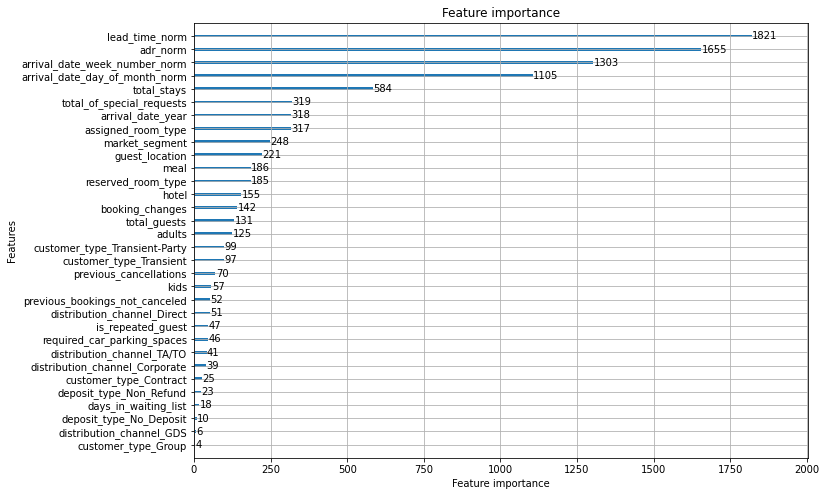

In [256]:
ax = lgb.plot_importance(model_LGBM)
fig = ax.figure
fig.set_size_inches(11, 8)

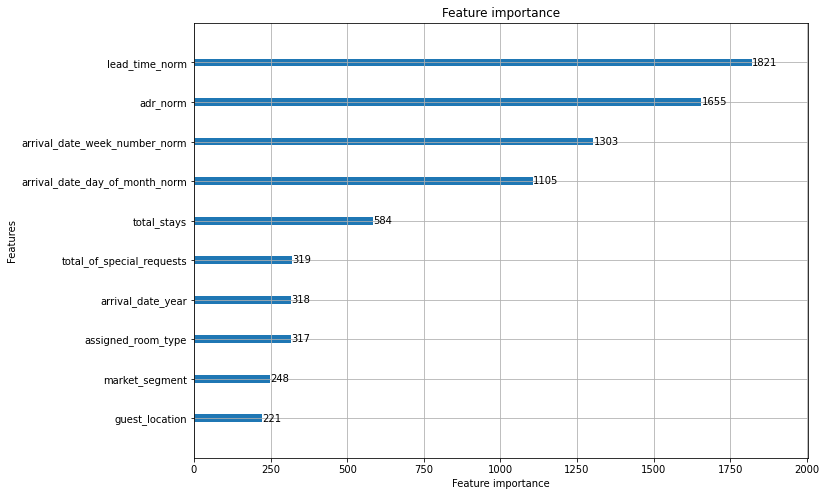

In [257]:
ax = lgb.plot_importance(model_LGBM, max_num_features=10)
fig = ax.figure
fig.set_size_inches(11, 8)

dari feature importance ini kita dapat mengetahui lead time merupakan fitur yang paling berpengaruh

### feature selection from feature importance



mengambil top 10 fitur teratas dari feature importance

In [258]:
importance = []
for col,score in zip(X_train.columns,model_LGBM.feature_importances_):
    #print(col,score)
    if(score > 200):
      importance.append(col)


In [259]:
importance

['assigned_room_type',
 'total_of_special_requests',
 'lead_time_norm',
 'adr_norm',
 'total_stays',
 'arrival_date_year',
 'arrival_date_week_number_norm',
 'arrival_date_day_of_month_norm',
 'guest_location',
 'market_segment']

set top 10 fitur teratas menjadi data baru

In [260]:
X_train_new = X_train[importance]
X_test_new = X_test[importance]

### experiment dengan data baru (top 10 fitur)

mencoba model sebelum ini dengan data baru

In [261]:
# parameter sama seperti sebelumnya
model_LGBM = lgb.LGBMClassifier(**trial_lgbm.params)
fit_model_LGBM = model_LGBM.fit(X_train_new,y_train)
pred_LGBM = fit_model_LGBM.predict(X_test_new)
accuracy=accuracy_score(y_test, pred_LGBM)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_LGBM)))

LightGBM Model accuracy score: 0.8529


In [262]:
train_data = lgb.Dataset(X_train_new, label=y_train)

hyperparameter tuning model baru

In [263]:
import optuna

def objective_lgbm(trial):
    
    param = {
        'objective': 'binary',
        'metric': 'accuracy_score',
        'num_leaves': trial.suggest_int('num_leaves', 10,100),
        'num_boost_rounds': trial.suggest_int('num_boost_rounds', 100,300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1,1)
    }
    
    LightGBM_Manual = lgb.train(param, train_data, num_boost_rounds)
    preds=LightGBM_Manual.predict(X_test_new)
    pred_labels = np.rint(preds)
    accuracy = round(accuracy_score(y_test, pred_labels),4)
    return accuracy
    
study_lgbm = optuna.create_study(direction='maximize',study_name="LGBM")
study_lgbm.optimize(objective_lgbm, n_trials=100)

[I 2022-08-28 13:50:59,141] A new study created in memory with name: LGBM
[I 2022-08-28 13:51:00,447] Trial 0 finished with value: 0.8417 and parameters: {'num_leaves': 24, 'num_boost_rounds': 215, 'learning_rate': 0.2138667006822729}. Best is trial 0 with value: 0.8417.
[I 2022-08-28 13:51:02,650] Trial 1 finished with value: 0.8458 and parameters: {'num_leaves': 22, 'num_boost_rounds': 166, 'learning_rate': 0.4184375646233898}. Best is trial 1 with value: 0.8458.
[I 2022-08-28 13:51:08,231] Trial 2 finished with value: 0.8465 and parameters: {'num_leaves': 67, 'num_boost_rounds': 276, 'learning_rate': 0.6121091181758433}. Best is trial 2 with value: 0.8465.
[I 2022-08-28 13:51:15,874] Trial 3 finished with value: 0.8359 and parameters: {'num_leaves': 25, 'num_boost_rounds': 249, 'learning_rate': 0.10180237522804231}. Best is trial 2 with value: 0.8465.
[I 2022-08-28 13:51:26,038] Trial 4 finished with value: 0.8544 and parameters: {'num_leaves': 90, 'num_boost_rounds': 108, 'learning

In [264]:
trial_lgbm = study_lgbm.best_trial
print("Model Accuracy --> ",trial_lgbm.value)
print("Model's Best parameters --> ",trial_lgbm.params)

Model Accuracy -->  0.8578
Model's Best parameters -->  {'num_leaves': 99, 'num_boost_rounds': 101, 'learning_rate': 0.25818475777817157}


membuat model baru setelah hyperparameter tuning

In [265]:
# build the lightgbm model
model_LGBM = lgb.LGBMClassifier(**trial_lgbm.params)
fit_model_LGBM = model_LGBM.fit(X_train_new,y_train)
pred_LGBM = fit_model_LGBM.predict(X_test_new)
accuracy=accuracy_score(y_test, pred_LGBM)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_LGBM)))

LightGBM Model accuracy score: 0.8541


In [266]:
# compare train and test set accuracy
y_pred_train = fit_model_LGBM.predict(X_train_new)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9021


cek overfit

In [267]:
# accuracy
# check for overfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model_LGBM.score(X_train_new, y_train)))
print('Test set score: {:.4f}'.format(model_LGBM.score(X_test_new, y_test)))

Training set score: 0.9021
Test set score: 0.8541


In [268]:
# precision recall f1-score
print("Precision (Test Set): %.4f" % precision_score(y_test, pred_LGBM))
print("Recall (Test Set): %.4f" % recall_score(y_test, pred_LGBM))
print("F1-Score (Test Set): %.4f" % f1_score(y_test, pred_LGBM))

Precision (Test Set): 0.8312
Recall (Test Set): 0.7628
F1-Score (Test Set): 0.7955


**Random Forest**

In [269]:
# Split Feature and Label
X = df_clean[['hotel','adults','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','days_in_waiting_list',
 'required_car_parking_spaces','total_of_special_requests','lead_time_norm','adr_norm',
 'distribution_channel_Corporate',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'deposit_type_No Deposit',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Contract',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party','total_stays',
 'total_guests','kids','arrival_date_year',
 'arrival_date_week_number_norm',
 'arrival_date_day_of_month_norm','guest_location','meal','market_segment',
]]

y = df_clean['is_canceled'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [270]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
eval_classification(rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.8845
Precision (Test Set): 0.8772
Recall (Test Set): 0.8019
F1-Score (Test Set): 0.8379
AUC: 0.9536


In [271]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import uniform
import numpy as np

#List Hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )


# Inisialisasi Model
dt = RandomForestClassifier(random_state=42)
rf = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='accuracy')
rf.fit(X_train, y_train)

# Predict & Evaluation
y_pred = rf.predict(X_test)#Check performa dari model
eval_classification(rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.8816
Precision (Test Set): 0.8818
Recall (Test Set): 0.7874
F1-Score (Test Set): 0.8319
AUC: 0.9530


In [272]:
rf.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 83}

In [273]:
 rf = RandomForestClassifier(random_state = 42,
                             min_samples_split= 2,
                             min_samples_leaf= 1,
                             max_features= 'auto',
                             max_depth= 200,
                             bootstrap = True,
                             n_estimators = 400)
 rf.fit(X_train, y_train)
 pred = rf.predict(X_test)
 eval_classification(rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.8868
Precision (Test Set): 0.8791
Recall (Test Set): 0.8068
F1-Score (Test Set): 0.8414
AUC: 0.9549


###coba (tdk digunakan) (untuk keperluan coba coba)

In [274]:
# Manual tuning
import numpy as np
train_data = lgb.Dataset(X_train, label=y_train)
param = {'objective': 'binary', 'num_leaves': 20, 'learning_rate' : 0.2}
num_boost_rounds = 200
LightGBM_Manual = lgb.train(param, train_data, num_boost_rounds)
# predict the results
preds=LightGBM_Manual.predict(X_test)
pred_labels = np.rint(preds)
accuracy = accuracy_score(y_test, pred_labels)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_labels)))

LightGBM Model accuracy score: 0.8697


In [275]:
# Manual tuning
# Let’s change the number of boosting rounds and learning rate
import numpy as np
train_data = lgb.Dataset(X_train, label=y_train)
param = {'objective': 'binary', 'num_leaves': 20, 'learning_rate' : 0.4}
num_boost_rounds = 150
LightGBM_Manual = lgb.train(param, train_data, num_boost_rounds)
# predict the results
preds=LightGBM_Manual.predict(X_test)
pred_labels = np.rint(preds)
accuracy = accuracy_score(y_test, pred_labels)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_labels)))

LightGBM Model accuracy score: 0.8717


In [276]:
import optuna
def objective_lgbm(trial):
    
    param = {
        'objective': 'binary',
        'metric': 'accuracy_score',
        'num_leaves': trial.suggest_int('num_leaves', 10,100),
        'num_boost_rounds': trial.suggest_int('num_boost_rounds', 100,300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1,1),
        'max_depth': trial.suggest_int('max_depth', 1,100),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree',0.1,1)
    }
    
    LightGBM_Manual = lgb.train(param, train_data, num_boost_rounds)
    preds=LightGBM_Manual.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = round(accuracy_score(y_test, pred_labels),4)
    return accuracy
    
study_lgbm = optuna.create_study(direction='maximize',study_name="LGBM")
study_lgbm.optimize(objective_lgbm, n_trials=100)

#Model Accuracy -->  0.8825
#LightGBM Model accuracy score: 0.8779

[I 2022-08-28 14:00:47,227] A new study created in memory with name: LGBM
[I 2022-08-28 14:00:49,165] Trial 0 finished with value: 0.8177 and parameters: {'num_leaves': 87, 'num_boost_rounds': 191, 'learning_rate': 0.8664141551464173, 'max_depth': 45, 'colsample_bytree': 0.5019058148219885}. Best is trial 0 with value: 0.8177.
[I 2022-08-28 14:00:50,790] Trial 1 finished with value: 0.8635 and parameters: {'num_leaves': 82, 'num_boost_rounds': 207, 'learning_rate': 0.34329994481392195, 'max_depth': 60, 'colsample_bytree': 0.12451137564097933}. Best is trial 1 with value: 0.8635.
[I 2022-08-28 14:00:52,377] Trial 2 finished with value: 0.8478 and parameters: {'num_leaves': 62, 'num_boost_rounds': 151, 'learning_rate': 0.11084375766349798, 'max_depth': 19, 'colsample_bytree': 0.1480436481667596}. Best is trial 1 with value: 0.8635.
[I 2022-08-28 14:00:54,157] Trial 3 finished with value: 0.8754 and parameters: {'num_leaves': 45, 'num_boost_rounds': 210, 'learning_rate': 0.261379085438816

In [277]:
import optuna
def objective_lgbm(trial):
    
    param = {
        'objective': 'binary',
        'metric': 'accuracy_score',
        'num_leaves': trial.suggest_int('num_leaves', 10,100),
        'num_boost_rounds': trial.suggest_int('num_boost_rounds', 100,300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.0001,1),
        'max_depth': trial.suggest_int('max_depth', 1,100),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree',0.1,1),
        'reg_alpha' : trial.suggest_loguniform('reg_alpha',0.1,10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda',0.1,10),
        'min_split_gain': trial.suggest_loguniform('min_split_gain',0.1,1),
        'subsample': trial.suggest_loguniform('subsample',0.1,1),
    }
    
    LightGBM_Manual = lgb.train(param, train_data, num_boost_rounds)
    preds=LightGBM_Manual.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = round(accuracy_score(y_test, pred_labels),4)
    return accuracy

study_lgbm = optuna.create_study(direction='maximize',study_name="LGBM")
study_lgbm.optimize(objective_lgbm, n_trials=200)

[I 2022-08-28 14:04:16,881] A new study created in memory with name: LGBM
[I 2022-08-28 14:04:18,579] Trial 0 finished with value: 0.6279 and parameters: {'num_leaves': 99, 'num_boost_rounds': 252, 'learning_rate': 0.000470880461186719, 'max_depth': 57, 'colsample_bytree': 0.13573012788927638, 'reg_alpha': 0.8920412653427753, 'reg_lambda': 0.6053934583451108, 'min_split_gain': 0.21699917950118466, 'subsample': 0.2496587790765019}. Best is trial 0 with value: 0.6279.
[I 2022-08-28 14:04:20,086] Trial 1 finished with value: 0.8684 and parameters: {'num_leaves': 64, 'num_boost_rounds': 209, 'learning_rate': 0.3746021124618698, 'max_depth': 50, 'colsample_bytree': 0.19009824007287987, 'reg_alpha': 0.7187758352113175, 'reg_lambda': 0.8998292418959404, 'min_split_gain': 0.19813496832642383, 'subsample': 0.3907944053119081}. Best is trial 1 with value: 0.8684.
[I 2022-08-28 14:04:21,961] Trial 2 finished with value: 0.6279 and parameters: {'num_leaves': 53, 'num_boost_rounds': 245, 'learning_

In [278]:
trial_lgbm = study_lgbm.best_trial
print("Model Accuracy --> ",trial_lgbm.value)
print("Model's Best parameters --> ",trial_lgbm.params)

Model Accuracy -->  0.8823
Model's Best parameters -->  {'num_leaves': 96, 'num_boost_rounds': 234, 'learning_rate': 0.23601531689210287, 'max_depth': 26, 'colsample_bytree': 0.7924479091332521, 'reg_alpha': 0.8608387091742392, 'reg_lambda': 0.15141764823351714, 'min_split_gain': 0.10706226663642575, 'subsample': 0.14789077888620905}


In [279]:
trial_lgbm2 = study_lgbm.best_trial
model_LGBM2 = lgb.LGBMClassifier(**trial_lgbm2.params)
fit_model_LGBM2 = model_LGBM2.fit(X_train,y_train)
pred_LGBM2 = fit_model_LGBM2.predict(X_test)
# view accuracy manually tuned
accuracy=accuracy_score(y_test, pred_LGBM2)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_LGBM2)))

LightGBM Model accuracy score: 0.8794


In [280]:
optuna.visualization.plot_param_importances(study_lgbm)

In [281]:
from optuna.integration import LightGBMPruningCallback
import lightgbm as lgbm
from sklearn.metrics import log_loss, mean_squared_error

In [282]:
def objective(trial, X, y):
    param_grid = {'num_leaves': trial.suggest_int('num_leaves', 10,100),
        'num_boost_rounds': trial.suggest_int('num_boost_rounds', 100,300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1,1),
        'max_depth': trial.suggest_int('max_depth', 1,100),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree',0.1,1),
        'reg_alpha' : trial.suggest_loguniform('reg_alpha',0.1,10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda',0.1,10),
        'min_split_gain': trial.suggest_loguniform('min_split_gain',0.1,1),
        'subsample': trial.suggest_loguniform('subsample',0.1,1) 
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)
    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
    model = lgbm.LGBMClassifier(objective="binary", **param_grid)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        eval_metric="binary_logloss",
        early_stopping_rounds=100,
        callbacks=[
            LightGBMPruningCallback(trial, "binary_logloss")
        ],  # Add a pruning callback
    )
    preds = model.predict_proba(X_test)
    cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)